In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [0]:
def load_data(filename):
    data = pd.read_csv(filename)
    
    return data

In [3]:
#Loading training data
train = load_data('train.csv')
print(train.shape)
train.head()


(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
#Loading testing data
test = load_data('test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Separating pixels and labels
x_train = (train.iloc[:,1:].values)
y_train = train.iloc[:,0]

x_test = test.values

In [6]:
print(x_train.shape)
print(y_train.shape)

(42000, 784)
(42000,)


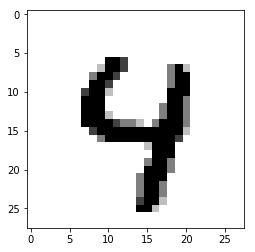

In [7]:
# Plot a number image from data

n = x_train[78]
n.shape=(28, 28)
plt.imshow(255-n,cmap = 'gray')

In [0]:
# To reduce noise from images

def standardize(data): 
    
    mean = data.mean().astype(np.float32)
    std = data.std().astype(np.float32)
    
    return (data-mean)/std

In [0]:
x_train = standardize(x_train)
x_test = standardize(x_test)

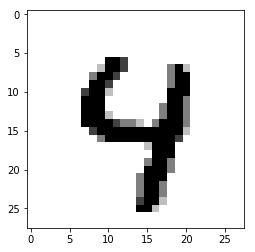

In [10]:
# Plot a number image from data after standardizing

n = x_train[78]
n.shape=(28, 28)
plt.imshow(255-n,cmap = 'gray')

In [0]:
# Reshaping the data before feeding to CNN
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')

In [12]:
print(x_train.shape)
print(x_test.shape)

(42000, 1, 28, 28)
(28000, 1, 28, 28)


In [0]:
# Covert labels to categorical labels with dummy encoding
y_train = np_utils.to_categorical(y_train) 

In [14]:
print(y_train[0:4])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [0]:
# Number of classes in dataset
num_classes = y_train.shape[1]

In [0]:
def model(activation_function, loss_function, optimizer):
    
    #build model
    model = Sequential()
    model.add(Conv2D(20, (5, 5), border_mode="same", input_shape=(1, 28, 28), activation=activation_function))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(50, (5, 5), border_mode="same", activation=activation_function))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(100, (5, 5), border_mode="same", activation=activation_function))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(500, activation=activation_function))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [17]:
#Initialize the model
model = model('relu', 'categorical_crossentropy', 'adam')

#Model summary
print(model.summary())


W0829 17:21:45.428253 140448140662656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (5, 5), input_shape=(1, 28, 28..., activation="relu", padding="same")`
  """
W0829 17:21:45.445158 140448140662656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 17:21:45.448629 140448140662656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 17:21:45.462358 140448140662656 deprecation_wrapper.py:119] From /

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 28, 28)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 14, 14)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 14, 14)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 7, 7)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 7, 7)         125100    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 3, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 900)               0         
__________

In [18]:
# Model Training
model.fit(x_train, y_train, validation_split=0.10, epochs=10, batch_size=200, verbose=2)


W0829 17:21:45.824350 140448140662656 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 37800 samples, validate on 4200 samples
Epoch 1/10
 - 123s - loss: 0.2407 - acc: 0.9229 - val_loss: 0.0749 - val_acc: 0.9745
Epoch 2/10
 - 124s - loss: 0.0526 - acc: 0.9834 - val_loss: 0.0480 - val_acc: 0.9836
Epoch 3/10
 - 123s - loss: 0.0387 - acc: 0.9882 - val_loss: 0.0501 - val_acc: 0.9845
Epoch 4/10
 - 123s - loss: 0.0298 - acc: 0.9906 - val_loss: 0.0386 - val_acc: 0.9876
Epoch 5/10
 - 123s - loss: 0.0213 - acc: 0.9932 - val_loss: 0.0316 - val_acc: 0.9893
Epoch 6/10
 - 123s - loss: 0.0157 - acc: 0.9954 - val_loss: 0.0379 - val_acc: 0.9900
Epoch 7/10
 - 123s - loss: 0.0142 - acc: 0.9951 - val_loss: 0.0419 - val_acc: 0.9879
Epoch 8/10
 - 123s - loss: 0.0115 - acc: 0.9963 - val_loss: 0.0415 - val_acc: 0.9895
Epoch 9/10
 - 122s - loss: 0.0113 - acc: 0.9966 - val_loss: 0.0430 - val_acc: 0.9886
Epoch 10/10
 - 122s - loss: 0.0128 - acc: 0.9958 - val_loss: 0.0501 - val_acc: 0.9855


In [0]:
# Model Testing
y_predict = model.predict_classes(x_test, verbose=0)


In [0]:
# Save model predictions
def save_prediction(y_predict, fname):
    pd.DataFrame({"ImageId": list(range(1,len(y_predict)+1)), "Label": y_predict}).to_csv(fname, index=False, header=True)

save_prediction(y_predict, "MultiLayer_CNN_GitHub.csv")